In [21]:
import cv2
import glob
import numpy as np
from IPython.display import display, Image

def display_cv_image(image, format='.png'):
    decoded_bytes = cv2.imencode(format, image)[1].tobytes()
    display(Image(data=decoded_bytes))

# h * w のグレースケール
def normalize(img, h, w):
    size = img.shape[:2]
    f = min(h / size[0], w / size[1])
    resized = cv2.resize(img, (int(size[1] * f), int(size[0] * f)), interpolation=cv2.INTER_AREA)
    
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    blank = np.full((h, w), np.uint8(255), dtype=np.uint8)
    hstart = (h - gray.shape[0]) / 2
    wstart = (w - gray.shape[1]) / 2
    blank[hstart:(hstart + gray.shape[0]), wstart:(wstart + gray.shape[1])] = gray
    return blank

labels = ['gyoku', 'ou', 'kin', 'gin', 'kei', 'kyo', 'kaku', 'hi', 'fu', 'narigin', 'narikei', 'narikyo', 'uma', 'ryu', 'to']

from pathlib import Path
for i, directory in enumerate(glob.glob('images/koma/series/*')):
    found = []
    imgs = []
    print(directory)
    for label in labels:
        path = "%s/%s.png" % (directory, label)
        if Path(path).is_file():
            img = cv2.imread(path)
            img = normalize(img, 48, 48)
            imgs.append(img)
            found.append(label)
    np.savez_compressed('{0:02d}.npz'.format(i), labels=found, imgs=imgs)

images/koma/series/01
images/koma/series/02


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


images/koma/series/03
images/koma/series/04
images/koma/series/05
images/koma/series/06
images/koma/series/07
images/koma/series/08
images/koma/series/09
images/koma/series/10
images/koma/series/11
images/koma/series/12
images/koma/series/13
images/koma/series/14
images/koma/series/15
images/koma/series/16
images/koma/series/17
images/koma/series/18
images/koma/series/19
images/koma/series/20
images/koma/series/21
images/koma/series/22
images/koma/series/23
images/koma/series/24
images/koma/series/25


In [10]:
from IPython.display import display, Image

def display_cv_image(image, format='.png'):
    decoded_bytes = cv2.imencode(format, image)[1].tobytes()
    display(Image(data=decoded_bytes))

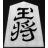

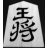

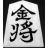

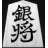

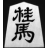

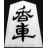

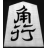

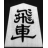

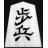

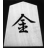

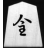

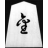

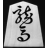

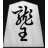

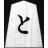

In [16]:
l = np.load("learn/10.npz")
for img in l['imgs']:
    display_cv_image(img)